In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py39hcbf5309_0        16.8 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.11.0-py39hcbf5309_0




c



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\Projects\TDAW\online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

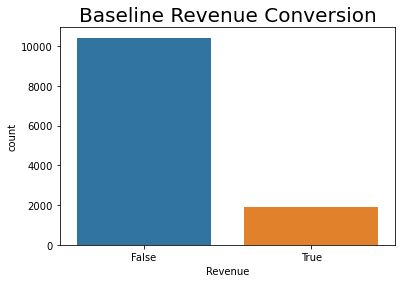

In [5]:
### Univariate Analysis ###

# Baseline Conversion Rate from the Revenue Column 
# How many of the online shopping sessions ended in a purchase

sns.countplot(df['Revenue'])
plt.title('Baseline Revenue Conversion', fontsize = 20)
plt.show()

In [6]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize = True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [7]:
## The baseline conversion rate of online visitors vs overall visitors
1908/(10422 + 1908) * 100

15.474452554744525

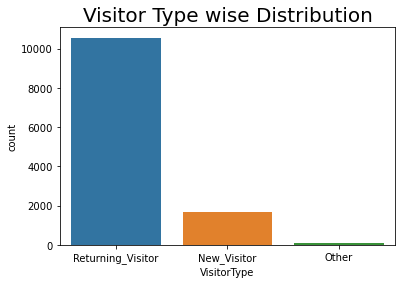

In [8]:
# Visitor-wise Distribution

sns.countplot(df['VisitorType'])
plt.title('Visitor Type wise Distribution', fontsize = 20)
plt.show()

In [9]:
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize = True))

"""
-  The number of returning customers is higher than that of new visitors.
-  been successful in attracting customers back to the website

"""

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


'\n-  The number of returning customers is higher than that of new visitors.\n-  been successful in attracting customers back to the website\n\n'

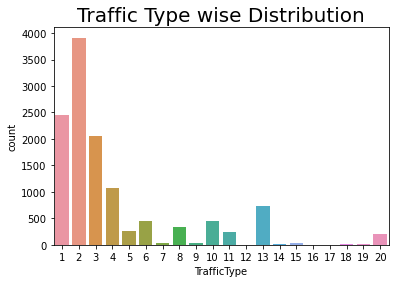

In [10]:
# Traffic-Wise Distribution 

sns.countplot(df['TrafficType'])
plt.title('Traffic Type wise Distribution', fontsize = 20)
plt.show()

In [11]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


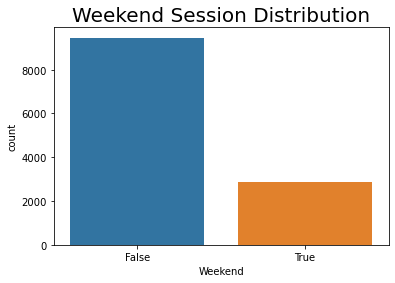

In [12]:
# the Distribution of Customers Session on the Website
"""
Consider the distribution of customers over days of the week
to determine whether customers are more active on weekends or weekdays. 

"""
sns.countplot(df['Weekend'])
plt.title('Weekend Session Distribution', fontsize =20)
plt.show()

In [13]:
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))

"""
More visitors visit during weekdays than weekend days.

"""

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


'\nMore visitors visit during weekdays than weekend days.\n\n'

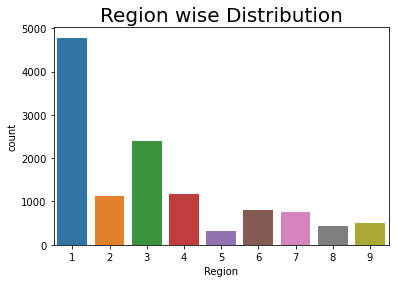

In [14]:
# Region-Wise Distribution

sns.countplot(df['Region'])
plt.title('Region wise Distribution', fontsize = 20)
plt.show()

In [15]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

"""
Regions 1 and 3 are where most potential consumers reside.

"""

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


'\nRegions 1 and 3 are where most potential consumers reside.\n\n'

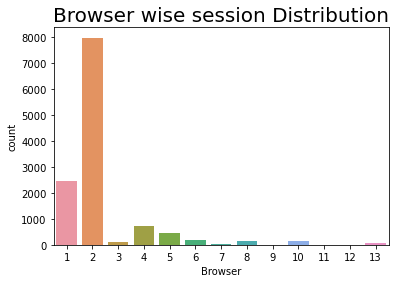

In [16]:
# the Browser and OS Distribution of Customers

sns.countplot(df['Browser'])
plt.title('Browser wise session Distribution', fontsize = 20)
plt.show()

In [17]:
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


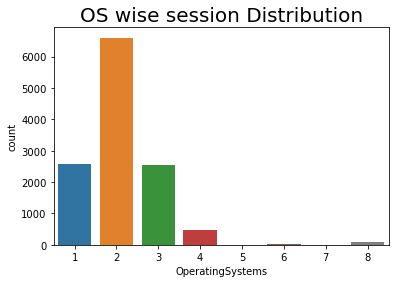

In [18]:
sns.countplot(df['OperatingSystems'])
plt.title('OS wise session Distribution', fontsize = 20)
plt.show()

In [19]:
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


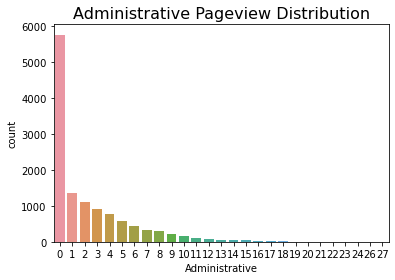

In [20]:
# Administrative Pageview Distribution

sns.countplot(df['Administrative'])
plt.title('Administrative Pageview Distribution', fontsize = 16)
plt.show()

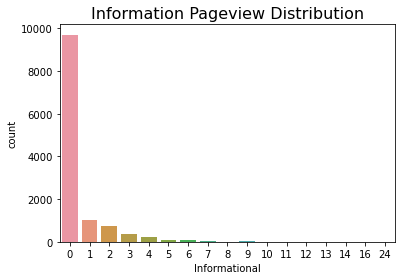

In [21]:
# Information Pageview Distribution 

sns.countplot(df['Informational'])
plt.title('Information Pageview Distribution', fontsize = 16)
plt.show()

In [22]:
print(df['Informational'].value_counts(normalize=True))

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


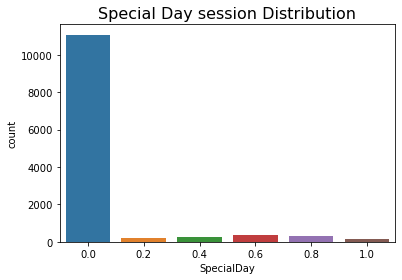

'\nSpecial days have no impact on the number of visitors to our website.\n\n'

In [23]:
# Special Day Session Distribution 

sns.countplot(df['SpecialDay'])
plt.title('Special Day session Distribution', fontsize = 16)
plt.show()

"""
Special days have no impact on the number of visitors to our website.

"""

In [24]:
print(df['SpecialDay'].value_counts(normalize=True
                                    
"""
89.8% of visitors visited during a non-special day (special day subcategory 0), 
showing that there is no affinity of web traffic toward special days.

"""

SyntaxError: invalid syntax (Temp/ipykernel_12332/444257968.py, line 3)

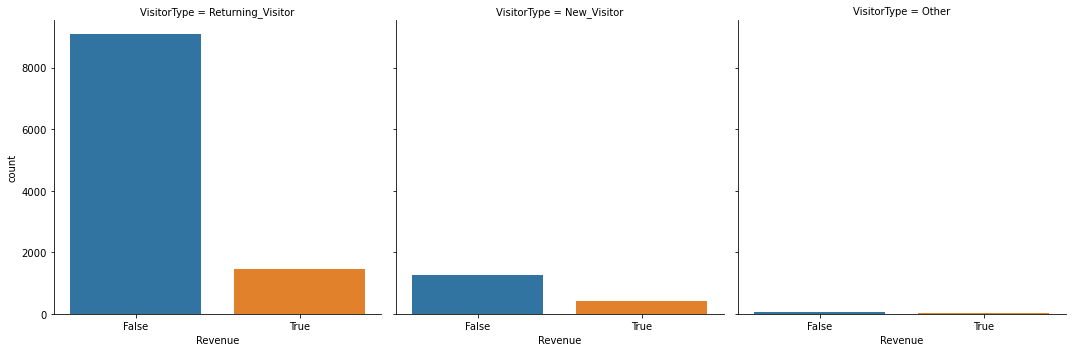

In [25]:
### Bivariate Analysis ###

# Consider the relationship between revenue and visitor type
q = sns.catplot("Revenue", col="VisitorType", col_wrap=3, data=df, kind="count", height=5, aspect=1)
plt.show()

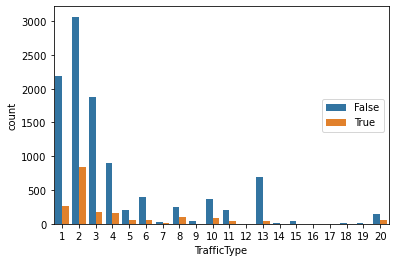

In [26]:
# Consider the relationship between revenue and traffic type
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

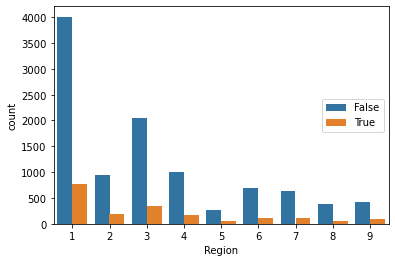

In [27]:
# Consider the relationship between revenue and region
sns.countplot(x="Region", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

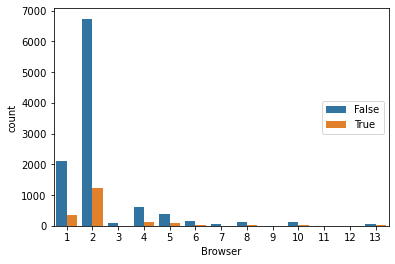

In [28]:
# Consider the relationship between revenue and browser type
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

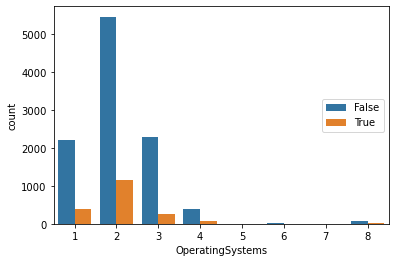

In [29]:
# Consider the relationship between revenue and OS type
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

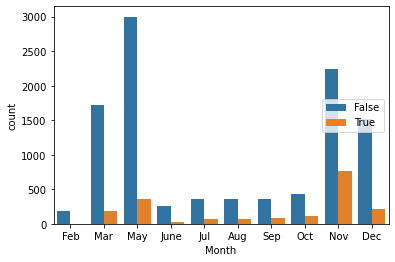

In [30]:
# Consider the relationship between revenue and month
sns.countplot(x="Month", hue="Revenue", data=df, order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(loc='right')
plt.show()

'\nThere is a positive correlation between the bounce rate and the exit rate. \nWith the increase in bounce rate, the exit rate of the page increases.\n\n'

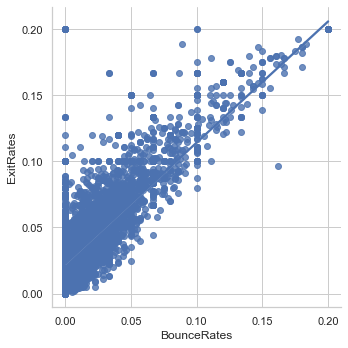

In [31]:
# The linear relationship between bounce rate versus exit rate

sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

"""
There is a positive correlation between the bounce rate and the exit rate. 
With the increase in bounce rate, the exit rate of the page increases.

"""

'\nThere is a negative correlation between page value and bounce rate. \nAs the page value increases, the bounce rate decreases.\n\n'

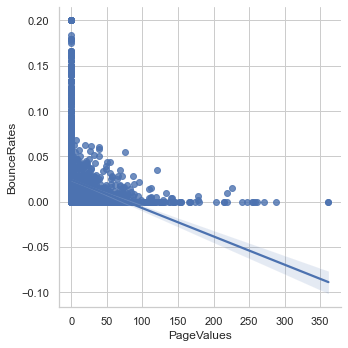

In [32]:
# The linear relationship between the page value and the bounce rate

sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates", data=df)

"""
There is a negative correlation between page value and bounce rate. 
As the page value increases, the bounce rate decreases.

"""

'\nThere is a negative correlation between page value and bounce rate. \nWeb pages with a better page value have a lower exit rate.\n\n'

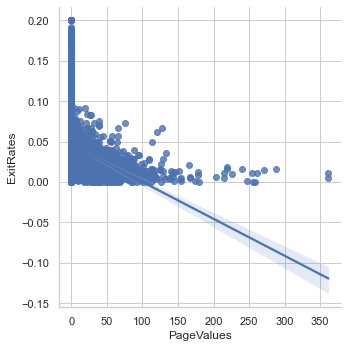

In [33]:
# The linear relationship between the page value and the exit rate

sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates", data=df)

"""
There is a negative correlation between page value and bounce rate. 
Web pages with a better page value have a lower exit rate.

"""

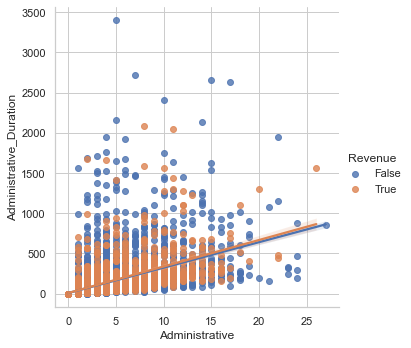

In [34]:
# Impact of Administration Page Views and Administrative Pageview Duration on Revenue

sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration", hue='Revenue', data=df)

"\nInformation page views and information pageview duration are positively correlated. \nCustomers who have made purchases visited fewer numbers of informational pages.\nInformational pageviews don't have much effect on revenue generation. \n\n"

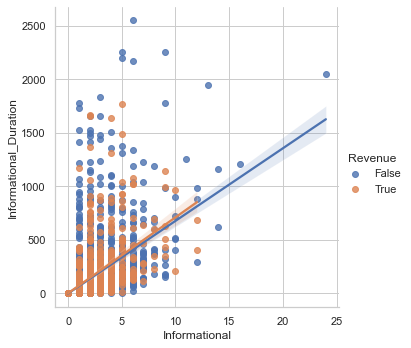

In [35]:
# Impact of Information Page Views and Information Pageview Duration on Revenue 

sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration", hue='Revenue', data=df)

"""
Information page views and information pageview duration are positively correlated. 
Customers who have made purchases visited fewer numbers of informational pages.
Informational pageviews don't have much effect on revenue generation. 

"""

In [107]:
### Clustering ###

In [36]:
# Performing K-means Clustering for Informational Duration versus Bounce Rate

x = df[['Informational_Duration','BounceRates']]
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state=30)
    kmeans.fit(x)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 24660.000000001433
2 13997.392328449023
3 5765.093121040991
4 3612.132353726491
5 2510.6250478905945
6 1692.127460489885
7 1292.7027958077585
8 990.9941633096643
9 813.997209344953


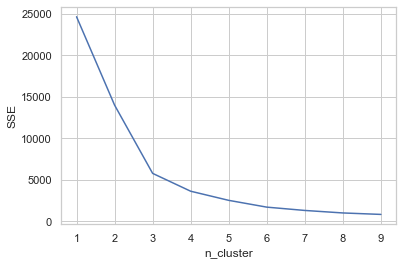

In [39]:
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

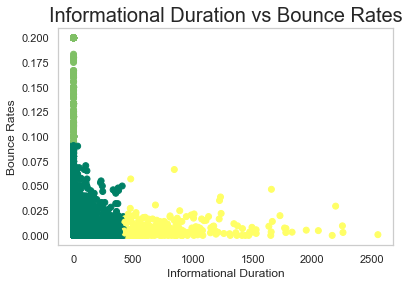

In [66]:
## Plot cluster
x_ = df['Informational_Duration']
y_ = df['BounceRates']
label = kmeans.labels_
plt.scatter(x_, y_, c=label, cmap='summer')
plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.show()

In [ ]:
"""
From the preceding graph, highly-targeted customers spend more than 500 seconds
on the Information page.

"""

In [67]:
# Performing K-means Clustering for Informational Duration versus Exit Rate
z = df[['Informational_Duration','ExitRates']]
scaler = StandardScaler()
z = scaler.fit_transform(z)

In [68]:
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state=30)
    kmeans.fit(z)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 24659.999999999476
2 15196.626754927753
3 6992.317513194735
4 4841.083153104872
5 3051.2201076424644
6 2236.985907157384
7 1698.8677855539022
8 1310.8716310353475
9 1099.9076896841452


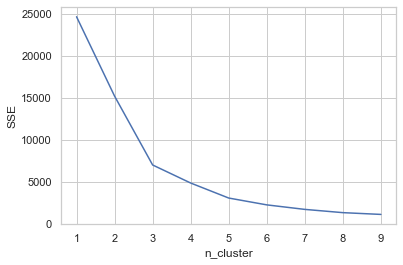

In [69]:
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [73]:
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(z)

KMeans(n_clusters=3, random_state=30)

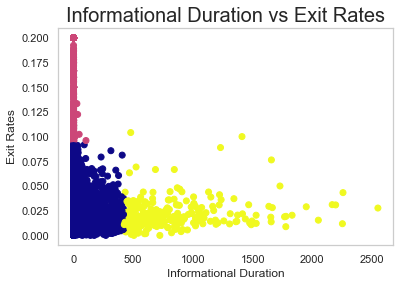

In [74]:
## Plot cluster
x_ = df['Informational_Duration']
y_ = df['ExitRates']
label = kmeans.labels_
plt.scatter(x_, y_, c=label, cmap='plasma')
plt.title('Informational Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.show()

In [75]:
# Performing K-means Clustering for Administrative Duration versus Bounce Rate
w = df[['Administrative_Duration','BounceRates']]
scaler = StandardScaler()
w = scaler.fit_transform(w)

In [77]:
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state=30)
    kmeans.fit(w)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 24659.999999998512
2 13855.767156314145
3 6852.52390037224
4 4284.188461495693
5 3193.9879621619784
6 2147.887596597338
7 1691.2566392734107
8 1403.93011515646
9 1128.249270681876


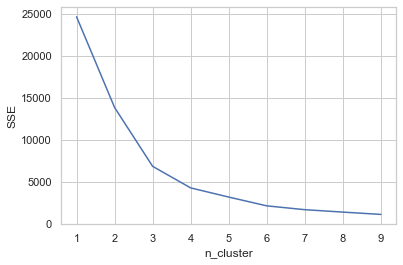

In [78]:
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(w)

KMeans(n_clusters=3, random_state=30)

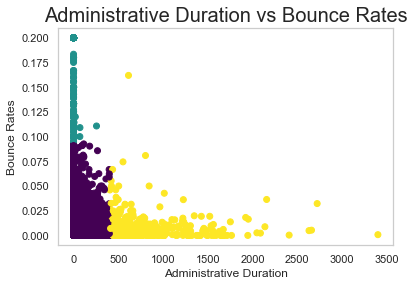

In [85]:
## Plot cluster
x_ = df['Administrative_Duration']
y_ = df['BounceRates']
label = kmeans.labels_
plt.scatter(x_, y_, c=label, cmap='viridis')
plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.show()

In [86]:
# Performing K-means Clustering for Administrative Duration versus Exit Rate
y = df[['Administrative_Duration','ExitRates']]
scaler = StandardScaler()
y = scaler.fit_transform(y)

In [87]:
sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state=30)
    kmeans.fit(y)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 24660.000000000215
2 14957.141769581749
3 8021.1565998795895
4 5460.915988805448
5 3702.115575890776
6 2687.238740433765
7 2178.4161642561016
8 1759.5515546461406
9 1481.6564522331903


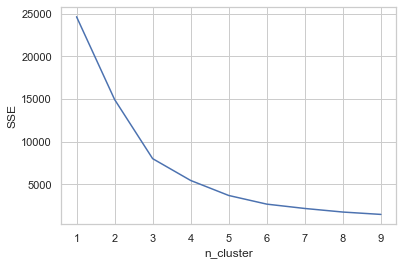

In [88]:
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [89]:
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(y)

KMeans(n_clusters=3, random_state=30)

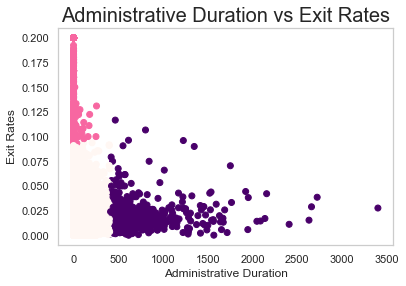

In [96]:
## Plot cluster
x_ = df['Administrative_Duration']
y_ = df['ExitRates']
label = kmeans.labels_
plt.scatter(x_, y_, c=label, cmap='RdPu')
plt.title('Administrative Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.show()

In [ ]:
"""
From the preceding graph, highly-targeted customers spend more than 500 seconds 
on the  administrative page before exiting.

"""

In [ ]:
"""
Conclusion:
- The conversion rates of new visitors are high compared to those of returning customers.
- While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.
- Pages with a high page value have a lower bounce rate. Should be talking with tech team to find ways to improve the page value of the web pages.

"""